# Combining the labeled Cytpix and Imagestream data into one dataset

## 27-06-2024

In [1]:
import cv2
import json
import os


import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

In [4]:
f = open(
    "/home/t.afanasyeva/deep_learning_anaemias/resources/annotations/240627_23-714262.json"
)
annotations = json.load(f)

In [5]:
annotations["categories"]

[{'id': 1, 'name': 'discocyte', 'supercategory': ''},
 {'id': 2, 'name': 'holly_leaf', 'supercategory': ''},
 {'id': 3, 'name': 'granular', 'supercategory': ''},
 {'id': 4, 'name': 'sickle', 'supercategory': ''},
 {'id': 5, 'name': 'echinocyte', 'supercategory': ''}]

only entries up to 2053 have been checked twice

In [6]:
ground_truth = annotations["annotations"][:2053]

In [7]:
image_ids = [record["image_id"] for record in ground_truth]
labels_tuples = [(record["image_id"], record["category_id"]) for record in ground_truth]
images = annotations["images"]
images[0]

{'id': 1,
 'width': 64,
 'height': 64,
 'file_name': '0000198e5271d6317b88554bb42519a3.png',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0}

In [8]:
file_names_tuples = [
    (record["id"], record["file_name"])
    for record in images
    if record["id"] in image_ids
]

file_name_labels_dict = {}
for file_name in file_names_tuples:
    for label in labels_tuples:
        if file_name[0] == label[0]:
            file_name_labels_dict[file_name[1]] = label[1]

In [9]:
annotations["categories"]

[{'id': 1, 'name': 'discocyte', 'supercategory': ''},
 {'id': 2, 'name': 'holly_leaf', 'supercategory': ''},
 {'id': 3, 'name': 'granular', 'supercategory': ''},
 {'id': 4, 'name': 'sickle', 'supercategory': ''},
 {'id': 5, 'name': 'echinocyte', 'supercategory': ''}]

In [10]:
maping_list = [(record["id"], record["name"]) for record in annotations["categories"]]
maping_list

[(1, 'discocyte'),
 (2, 'holly_leaf'),
 (3, 'granular'),
 (4, 'sickle'),
 (5, 'echinocyte')]

In [11]:
for key, value in file_name_labels_dict.items():
    for my_tuple in maping_list:
        if value == my_tuple[0]:
            file_name_labels_dict[key] = my_tuple[1]

In [12]:
label_df = pd.DataFrame.from_dict(
    file_name_labels_dict, orient="index", columns=["class"]
)

<Axes: >

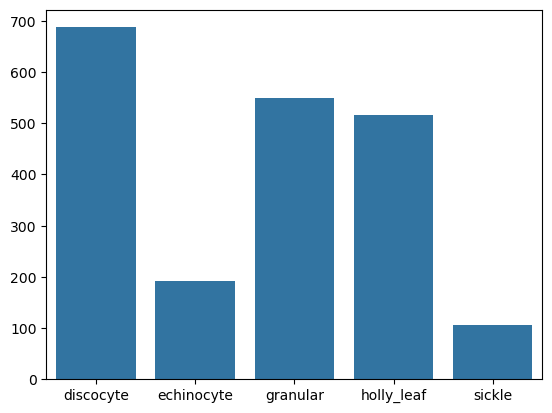

In [15]:
unique, counts = np.unique(y, return_counts=True)
sns.barplot(y=counts, x=unique)

In [16]:
path = "/home/t.afanasyeva/deep_learning_anaemias/resources/cytpix/23-714262"

In [17]:
my_list = ["echinocyte", "granular", "holly_leaf", "sickle"]
root_path = "/home/t.afanasyeva/deep_learning_anaemias/resources/training"
for items in my_list:
    path = os.path.join(root_path, items)
    os.mkdir(path)

In [18]:
for img_path in list(label_df.index):
    print("******")
    print(os.path.join(path, img_path))
    print(label_df.loc[img_path]["class"])
    img = cv2.imread(os.path.join(path, img_path), cv2.IMREAD_GRAYSCALE)
    output_path = os.path.join(root_path, label_df.loc[img_path]["class"], img_path)
    print(output_path)
    cv2.imwrite(output_path, img)